# Cognifyz Data Analysis Internship – Level 3

This level focuses on deeper analysis of customer engagement, restaurant popularity, and service availability using rating, votes, and pricing information from the dataset.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # only if needed

df = pd.read_csv('../data/dataset.csv', encoding='latin-1')
df = df.dropna(subset=['Cuisines'])
df = df.reset_index(drop=True)


# Level-3: Task-1 — Restaurant Reviews

The dataset does not contain detailed text-based customer reviews. Therefore, this task is performed using available rating-related information such as aggregate ratings and rating text to understand customer sentiment.

In [4]:
# Check distribution of rating text
rating_text_dist = df['Rating text'].value_counts()
rating_text_dist

Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: Rating text, dtype: int64

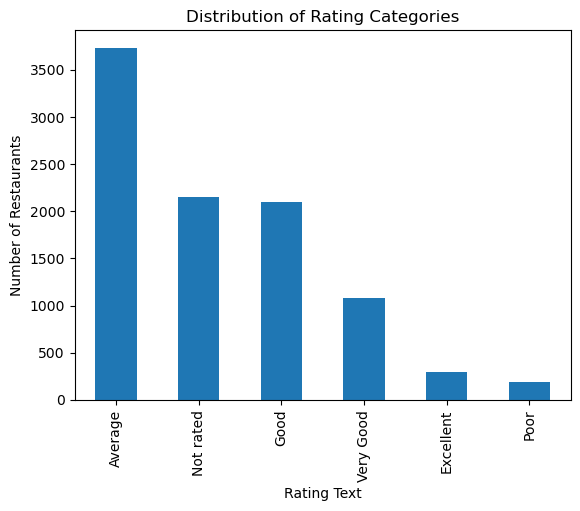

In [5]:
rating_text_dist.plot(kind='bar')
plt.xlabel('Rating Text')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Rating Categories')
plt.show()

In [6]:
# Average votes by rating text
avg_votes_by_rating = df.groupby('Rating text')['Votes'].mean()
avg_votes_by_rating

Rating text
Average       48.266202
Excellent    852.253333
Good         229.416985
Not rated      0.870112
Poor          90.715054
Very Good    519.867347
Name: Votes, dtype: float64

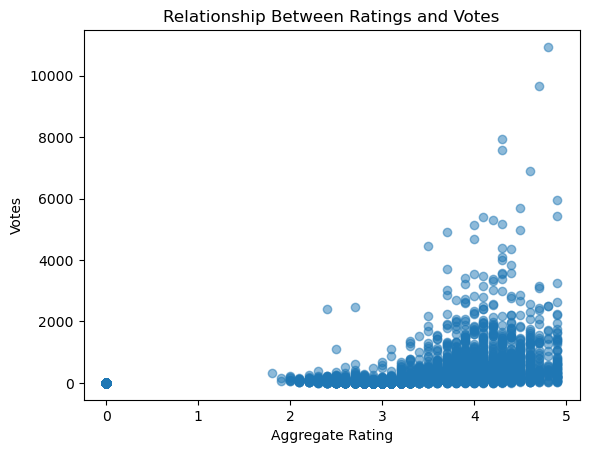

In [15]:
plt.scatter(df['Aggregate rating'], df['Votes'], alpha=0.5)
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.title('Relationship Between Ratings and Votes')
plt.show()

### Result

Since detailed text reviews are not available in the dataset, customer sentiment was analyzed using rating categories and aggregate ratings. The distribution of rating text shows that most restaurants fall under positive categories such as Good, Very Good, and Excellent. The analysis of votes indicates that restaurants with higher ratings generally receive more votes, suggesting higher customer engagement. This shows a positive relationship between customer satisfaction and the number of people who rate a restaurant.


# Level-3: Task-2 — Votes Analysis

In [9]:
# Restaurants with highest number of votes
top_voted_restaurants = df[['Restaurant Name', 'Votes']].sort_values(
    by='Votes', ascending=False)

top_voted_restaurants.head(5)


,Restaurant Name,Votes
719,Toit,10934
726,Truffles,9667
3985,Hauz Khas Social,7931
2403,Peter Cat,7574
730,AB's - Absolute Barbecues,6907


In [10]:
# Restaurants with lowest number of votes
low_voted_restaurants = df[['Restaurant Name', 'Votes']].sort_values(
    by='Votes', ascending=True)

low_voted_restaurants.head(5)


,Restaurant Name,Votes
891,Angaar,0
1036,U & I,0
1035,Tasty Dhaba Family Restaurant,0
1034,Shri Bikaner Misthan Bhandar,0
1032,Magical Momos,0


In [11]:
# Correlation between votes and aggregate rating
votes_rating_corr = df['Votes'].corr(df['Aggregate rating'])
votes_rating_corr

0.31347418032500046

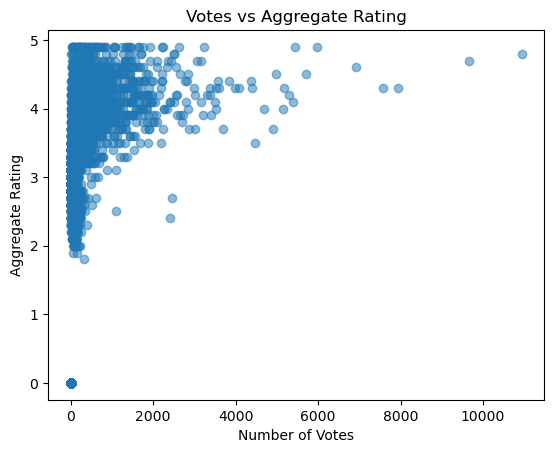

In [14]:
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5)
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.title('Votes vs Aggregate Rating')
plt.show()


### Result

The votes analysis shows that some restaurants receive a significantly higher number of votes, indicating strong customer engagement, while others receive very few votes. Restaurants with higher vote counts are generally more popular and well-known. The correlation analysis shows a positive relationship between the number of votes and aggregate rating, suggesting that restaurants receiving more customer feedback tend to have better ratings. This indicates that popularity and customer satisfaction are related.


# Level-3 : Task-3 — Price Range vs Online Delivery & Table Booking

In [16]:
# Online delivery availability by price range
price_online_delivery = pd.crosstab(df['Price range'], df['Has Online delivery'])
price_online_delivery


Has Online delivery,No,Yes
Price range,,
1,3737,701
2,1827,1286
3,994,411
4,533,53


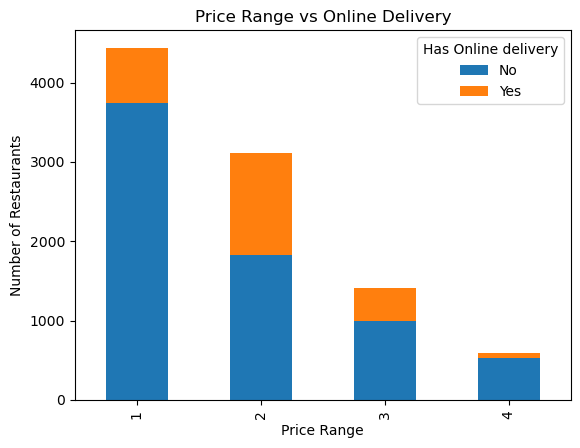

In [17]:
price_online_delivery.plot(kind='bar', stacked=True)
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Price Range vs Online Delivery')
plt.show()


In [18]:
# Table booking availability by price range
price_table_booking = pd.crosstab(df['Price range'], df['Has Table booking'])
price_table_booking


Has Table booking,No,Yes
Price range,,
1,4437,1
2,2874,239
3,761,644
4,312,274


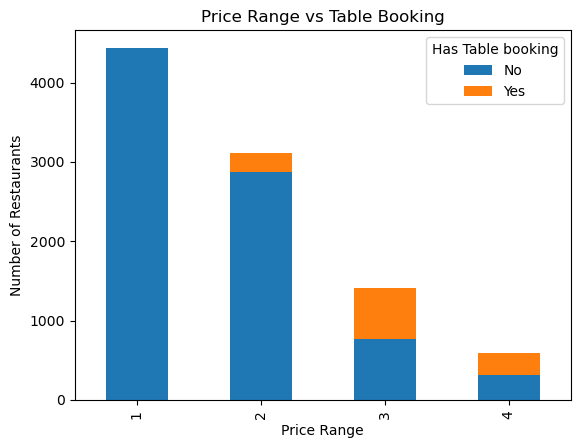

In [19]:
price_table_booking.plot(kind='bar', stacked=True)
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Price Range vs Table Booking')
plt.show()


### Result

The analysis shows that the availability of online delivery and table booking services varies across different price ranges. Lower-priced restaurants are more likely to offer online delivery, possibly to attract a larger number of customers. On the other hand, higher-priced restaurants show a greater tendency to provide table booking facilities, which aligns with a more formal dining experience. Overall, the results suggest that price range influences the type of services offered by restaurants.
